In [1]:
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
#following along with this tutorial https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a

In [2]:
df = quandl.get("WIKI/AMZN")

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [4]:
# Get the Adjusted Close Price 
df = df[['Adj. Close']] 


In [5]:
df.head()

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833


In [6]:
forecast_out = 30

In [7]:
#df.to_excel('test1.xlsx')

In [8]:
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

In [9]:
df.head()

,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000


In [10]:
df.tail(33)

,Adj. Close,Prediction
Date,,
2018-02-08,1350.47,1495.56
2018-02-09,1338.99,1555.86
2018-02-12,1386.23,1497.05
2018-02-13,1414.51,NaN
2018-02-14,1451.05,NaN
2018-02-15,1461.76,NaN
2018-02-16,1448.69,NaN
2018-02-20,1468.35,NaN
2018-02-21,1482.92,NaN


In [11]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]

In [12]:
X

array([[   1.72916667],
       [   1.70833333],
       [   1.63583333],
       ...,
       [1350.47      ],
       [1338.99      ],
       [1386.23      ]])

In [13]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


In [14]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9605807078058507


In [17]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.987034528249507


In [19]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1414.51]
 [1451.05]
 [1461.76]
 [1448.69]
 [1468.35]
 [1482.92]
 [1484.76]
 [1500.  ]
 [1521.95]
 [1511.98]
 [1512.45]
 [1493.45]
 [1500.25]
 [1523.61]
 [1537.64]
 [1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]


In [20]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1497.67149831 1536.44767091 1547.81310082 1533.94324378 1554.80639522
 1570.26804915 1572.22065336 1588.39330991 1611.68660462 1601.10646119
 1601.60522422 1581.44246343 1588.6586094  1613.44819319 1628.33680025
 1636.14721706 1643.4270349  1672.11121513 1692.80457489 1681.96974396
 1684.96232214 1675.75112405 1664.45997801 1636.0729332  1680.19754341
 1675.262973   1635.19213892 1583.68159107 1647.67182665 1585.262776  ]
[1058.75772505  681.33536841  680.34917714  707.58302067  680.34917714
  680.34917714  680.34917714  680.34917714  680.34917714  680.34917714
  680.34917714  680.34917714  680.34917714  680.34917714  680.34917714
  680.34917714  680.34917714  680.34917714  680.34917714  680.34917714
  680.34917714  680.34917714  680.34917714  680.34917714  680.34917714
  680.34917714  680.34917714  680.34917714  680.34917714  680.34917714]


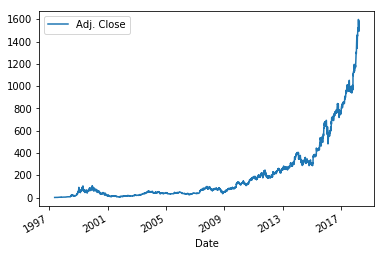

In [22]:

from matplotlib import pyplot
%matplotlib inline
series = df[['Adj. Close']]
series.plot()
pyplot.show()
